#Case category consumption meal each district in West Java using Naive Bayes test

In [ ]:
!pip install jcopml

#1. Preparation of Data

#Import all of libraries that is required

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
%matplotlib inline
import pydotplus

#Read in the "nutrition" csv file as DataFrame called "nutrition"

In [ ]:
nutrition = pd.read_csv("/content/nutrition_dt.csv")

In [ ]:
nutrition.tail(20)

,index,SAYUR-SAYURAN,UMBI-UMBIAN,IKAN,TELUR,SUSU,PADI PADIAN,DAGING,KONSUMSI
494,494,14879,7863,14035,2908,4728,12834,8269,high_consumption
495,495,12020,11050,15703,2363,2078,11550,9865,middle_comsumption
496,496,14421,10663,24493,2538,2638,12035,8454,middle_comsumption
497,497,31902,48010,5711,2867,56,7765,27933,middle_comsumption
498,498,42144,53383,20879,2519,3041,20027,26229,low_consumption
499,499,37738,93848,3846,2929,2964,38026,14110,low_consumption
500,500,15046,6668,22761,3345,2926,15458,9683,middle_comsumption
501,501,16368,3829,10544,3929,3054,13672,7465,middle_comsumption
502,502,15014,5745,25655,2260,2584,14743,5017,middle_comsumption
503,503,19250,9184,57251,2635,1524,21421,6712,middle_comsumption


#Check the head of "nutrition"

In [ ]:
nutrition['KONSUMSI'] = nutrition['KONSUMSI'].astype('category')
nutrition['KONSUMSI'] = nutrition['KONSUMSI'].cat.codes
nutrition.tail(10)

,index,SAYUR-SAYURAN,UMBI-UMBIAN,IKAN,TELUR,SUSU,PADI PADIAN,DAGING,KONSUMSI
504,504,10422,8196,26619,1438,1857,9248,7879,2
505,505,48882,118439,14749,11867,1593,27063,43183,1
506,506,52530,131451,9006,7794,2867,46367,11961,1
507,507,55406,91085,995,558,1952,20574,16365,1
508,508,55039,72288,23836,6974,1543,24917,33632,1
509,509,40076,44633,263,6996,6277,5830,13088,0
510,510,10029,5185,3571,2974,114,6805,14825,2
511,511,23695,11917,8609,6604,2387,21512,30585,2
512,512,25496,8174,4529,3494,2365,10036,18309,2
513,513,22613,4715,29177,5806,6667,18697,13098,0


#Check the "nutrition's' shape

In [ ]:
nutrition.shape

(514, 9)

#Check "nutrition" info

In [ ]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   index          514 non-null    int64
 1   SAYUR-SAYURAN  514 non-null    int64
 2   UMBI-UMBIAN    514 non-null    int64
 3   IKAN           514 non-null    int64
 4   TELUR          514 non-null    int64
 5   SUSU           514 non-null    int64
 6   PADI PADIAN    514 non-null    int64
 7   DAGING         514 non-null    int64
 8   KONSUMSI       514 non-null    int8 
dtypes: int64(8), int8(1)
memory usage: 32.8 KB


#Check null value in "nutrition"

In [ ]:
print(nutrition.isnull().sum())

index            0
SAYUR-SAYURAN    0
UMBI-UMBIAN      0
IKAN             0
TELUR            0
SUSU             0
PADI PADIAN      0
DAGING           0
KONSUMSI         0
dtype: int64


In [ ]:
nutrition.duplicated().sum()

0

#Drop "Index" column that it is useless for Naive Bayes calculation

In [ ]:
nutrition.drop(['index'],axis=1,inplace=True)

In [ ]:
nutrition.describe()

,SAYUR-SAYURAN,UMBI-UMBIAN,IKAN,TELUR,SUSU,PADI PADIAN,DAGING,KONSUMSI
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,13539.424125,3436.134241,15164.690661,3733.842412,3814.466926,18072.795720,7688.177043,1.389105
std,6262.752284,11118.323915,6446.213306,1273.870457,1906.273740,4233.064756,5685.061543,0.913596
min,5623.000000,137.000000,263.000000,558.000000,56.000000,5830.000000,638.000000,0.000000
25%,10316.500000,1156.500000,10723.000000,2914.500000,2470.750000,15531.000000,4726.250000,0.000000
50%,12778.500000,1566.000000,15307.000000,3617.000000,3428.500000,17543.000000,6783.500000,2.000000
75%,15172.000000,2102.500000,19366.500000,4406.000000,4780.000000,20155.500000,9466.500000,2.000000
max,78180.000000,131451.000000,57251.000000,17336.000000,11213.000000,46367.000000,85487.000000,2.000000


In [ ]:
X = nutrition.iloc[:,:-1]
y = nutrition.iloc[:,-1]

#Transform category data to be numerical data

In [ ]:
print(X.head())

   SAYUR-SAYURAN  UMBI-UMBIAN   IKAN  TELUR  SUSU  PADI PADIAN  DAGING
0          12350          864  16810   2824  1410        27051    3433
1          15781         1688  19371   3632  1907        17497    5926
2          11859          883  17808   2483  1121        20461    2350
3          13646         1123  18106   3289  1391        21137    5363
4          14479         1235  21435   3300  1249        17214    5581


In [ ]:
print(y.head())

0    2
1    2
2    2
3    2
4    2
Name: KONSUMSI, dtype: int8


#Create a linear model plot (using seaborn lmplot) "konsumsi" vs "daging"

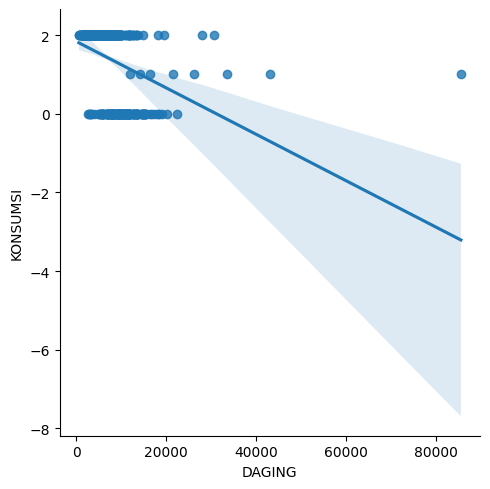

In [ ]:
sns.lmplot(y="KONSUMSI", x='DAGING', data=nutrition)

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets. Set test size=0.2 and random test=0

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
from jcopml.pipeline import num_pipe, cat_pipe

In [ ]:
preprocessor  = ColumnTransformer(['numeric', num_pipe(), ['SAYUR-SAYURAN	'],  ['UMBI-UMBIAN'], ['IKAN'], ['TELUR'], ['SUSU'],['PADI PADIAN'],['DAGING']])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X = nutrition.drop("KONSUMSI",axis=1)
y = nutrition['KONSUMSI']

#Import GaussianNB from sklearn.linear_model

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
pipeline = GaussianNB()
pipeline.fit(X_train, y_train)

GaussianNB()

#Print OLS Naive Bayes Result in watching performance model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
y_pred = pipeline.predict(X_test)
PIPELINE_acc = accuracy_score(y_pred, y_test)

In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy NBC: {:.2f}%".format(PIPELINE_acc*100))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.50      1.00      0.67         1
           2       0.99      0.94      0.96        83

    accuracy                           0.94       103
   macro avg       0.77      0.96      0.84       103
weighted avg       0.95      0.94      0.94       103

Accuracy NBC: 94.17%


#Create plot_confusion_matrix

In [ ]:
from jcopml.plot import plot_confusion_matrix

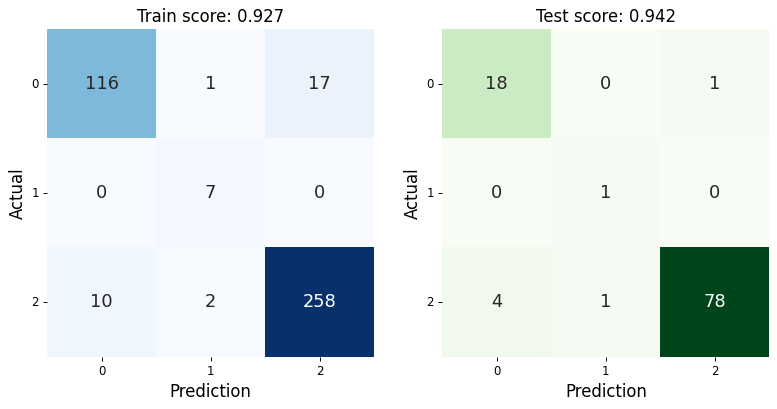

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

#Test model using new data

In [ ]:
new_data = {'SAYUR-SAYURAN':[21500],'UMBI-UMBIAN':[9000], 'IKAN':[8600], 'TELUR':[3600], 'SUSU':[2700], 'PADI PADIAN':[56000], 'DAGING':[1400]}

In [ ]:
new_data = pd.DataFrame(new_data)

In [ ]:
new_data

,SAYUR-SAYURAN,UMBI-UMBIAN,IKAN,TELUR,SUSU,PADI PADIAN,DAGING
0,21500,9000,8600,3600,2700,56000,1400


In [ ]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = pipeline.predict(scaled_new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
print(y_pred_new)

[2]
